In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv(r"C:\Users\sridh\Downloads\Crop Production data.csv")

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("\nColumn names and data types:\n", data.dtypes)
print("\nSummary statistics:\n", data.describe())
print("\nMissing values:\n", data.isnull().sum())

Shape of the dataset: (246091, 7)

Column names and data types:
 State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

Summary statistics:
            Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09

Missing values:
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [5]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
data['Production'].median()

729.0

In [8]:
data['Production'].mean()

582503.4422509808

In [9]:
production_mean = data['Production'].mean()
data['Production'].fillna(production_mean, inplace=True)


In [10]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
# Convert Crop_Year to datetime format
data['Crop_Year'] = pd.to_datetime(data['Crop_Year'], format='%Y')


data = data[data['Production'] < data['Production'].quantile(0.95)]

# Display the first few rows of the cleaned dataset
print("Cleaned dataset:\n", data.head())

Cleaned dataset:
                     State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif        
1  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif        
2  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif        
3  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [12]:
data.to_csv("cleaned_crop_production_data.csv", index=False)

C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


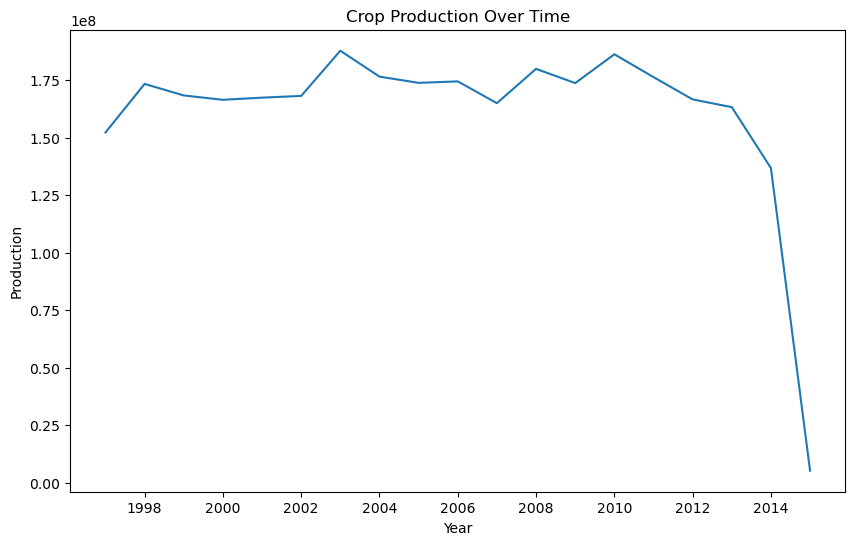

In [14]:
# Group the data by year and calculate the total production
production_over_time = data.groupby('Crop_Year')['Production'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=production_over_time.index, y=production_over_time.values)
plt.title('Crop Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

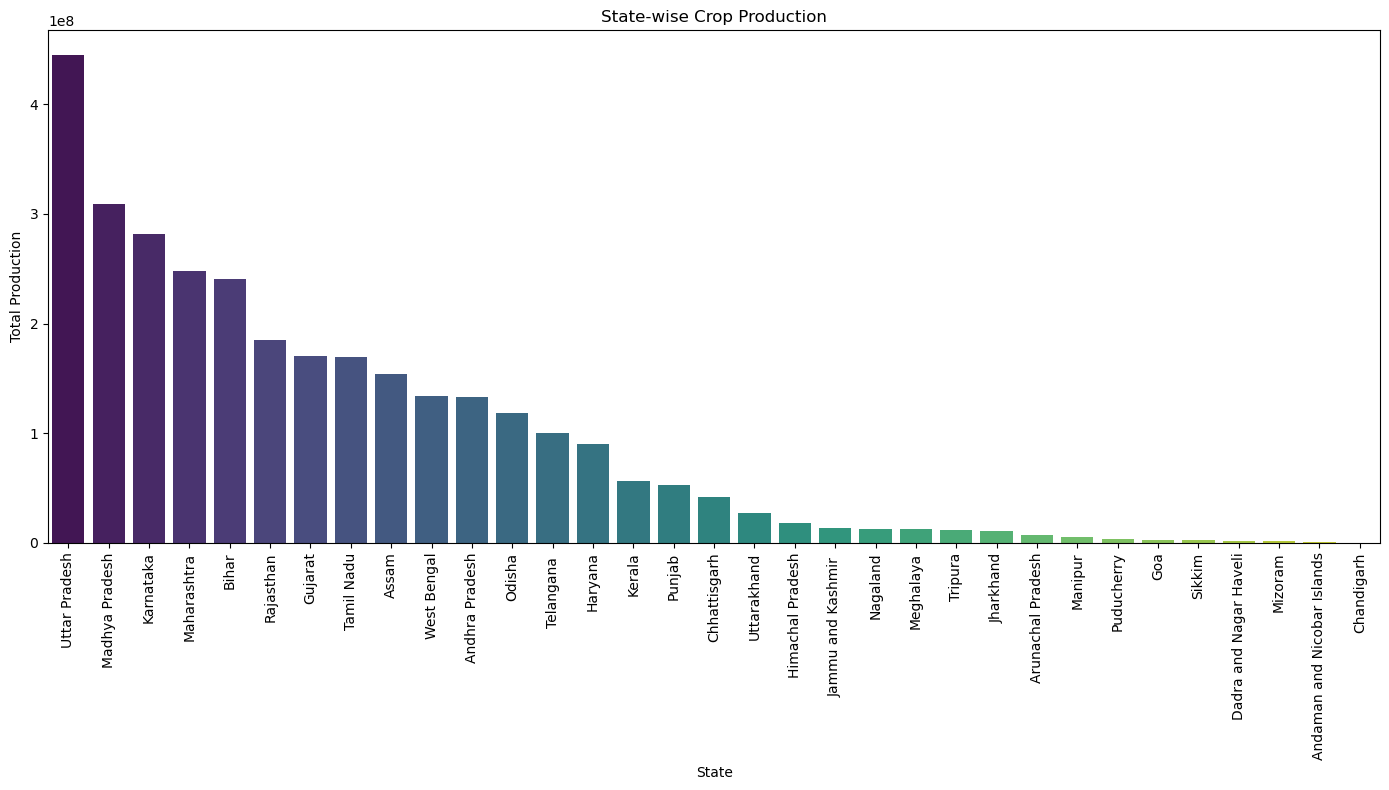

In [18]:

state_production = data.groupby('State_Name')['Production'].sum().reset_index()

# Sort the data for better visualization
state_production = state_production.sort_values(by='Production', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x=state_production['State_Name'], y=state_production['Production'], palette='viridis')
plt.title('State-wise Crop Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


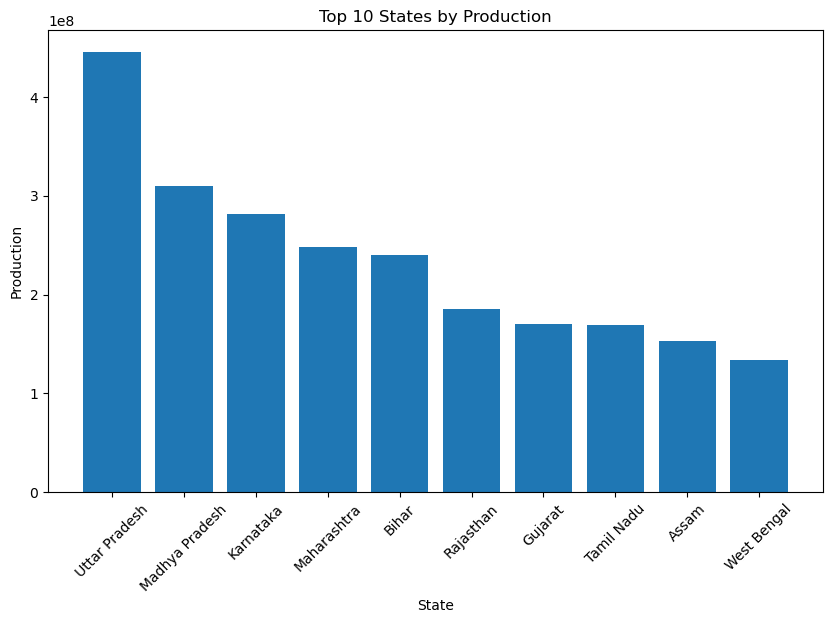

In [21]:
# Get the top 10 states by production
top_10_states = state_production.nlargest(10, 'Production')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State_Name'], top_10_states['Production'])
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Top 10 States by Production')
plt.xticks(rotation=45)
plt.show()


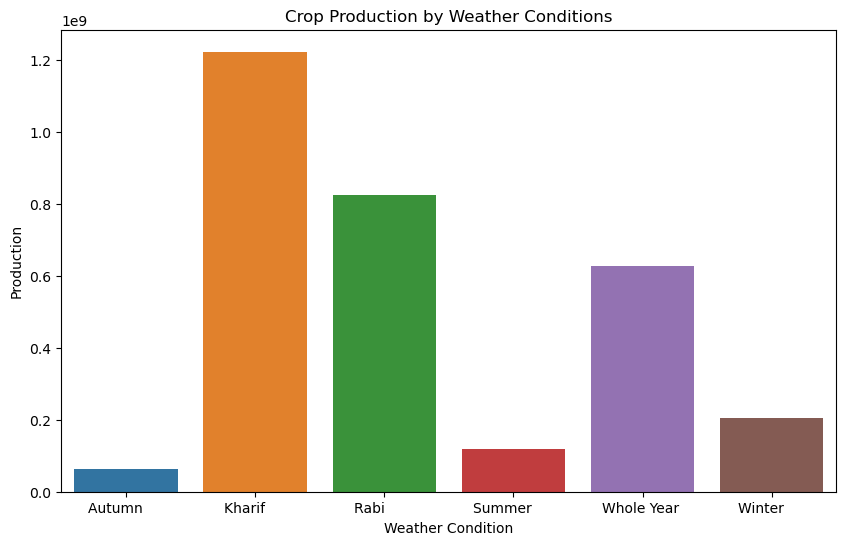

In [25]:
# Group the data by weather condition and calculate the total production
weather_production = data.groupby('Season')['Production'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_production.index, y=weather_production.values)
plt.title('Crop Production by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Production')
plt.show()